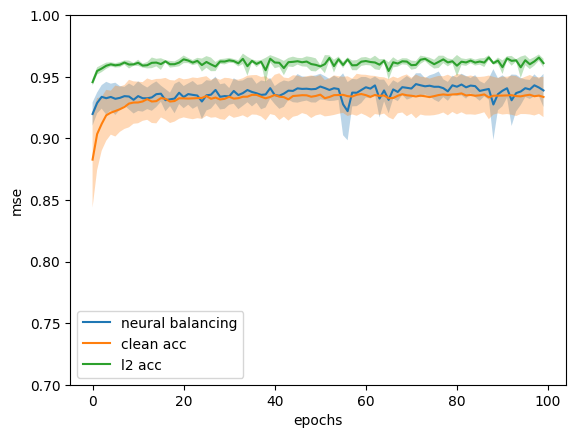

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

with open('runs/nbOnlineEveryEpochAcc0.pkl', 'rb') as file:
    acc0 = pickle.load(file)
with open('runs/nbOnlineEveryEpochAcc1.pkl', 'rb') as file:
    acc1 = pickle.load(file)
with open('runs/nbOnlineEveryEpochAcc2.pkl', 'rb') as file:
    acc2 = pickle.load(file)
with open('runs/nbOnlineEveryEpochAcc3.pkl', 'rb') as file:
    acc3 = pickle.load(file)
with open('runs/nbOnlineEveryEpochAcc4.pkl', 'rb') as file:
    acc4 = pickle.load(file)

# Sample data: multiple vectors
data0 = np.array([
    acc0,acc1,acc2,acc3,acc4
])

with open('runs/cleanAcc0.pkl', 'rb') as file:
    acc0 = pickle.load(file)
with open('runs/cleanAcc1.pkl', 'rb') as file:
    acc1 = pickle.load(file)
with open('runs/cleanAcc2.pkl', 'rb') as file:
    acc2 = pickle.load(file)
with open('runs/cleanAcc3.pkl', 'rb') as file:
    acc3 = pickle.load(file)
with open('runs/cleanAcc4.pkl', 'rb') as file:
    acc4 = pickle.load(file)

# Sample data: multiple vectors
data1 = np.array([
    acc0,acc1,acc2,acc3,acc4
])

with open('runs/l2regularization0.pkl', 'rb') as file:
    acc0 = pickle.load(file)
with open('runs/l2regularization1.pkl', 'rb') as file:
    acc1 = pickle.load(file)
with open('runs/l2regularization2.pkl', 'rb') as file:
    acc2 = pickle.load(file)
with open('runs/l2regularization3.pkl', 'rb') as file:
    acc3 = pickle.load(file)
with open('runs/l2regularization4.pkl', 'rb') as file:
    acc4 = pickle.load(file)

# Sample data: multiple vectors
data2 = np.array([
    acc0,acc1,acc2,acc3,acc4
])

# Calculate the mean and std for each point across vectors
mean_values_nb = np.mean(data0, axis=0)
std_values_nb = np.std(data0, axis=0)
mean_values = np.mean(data1, axis=0)
std_values = np.std(data1, axis=0)
mean_values_l2 = np.mean(data2, axis=0)
std_values_l2 = np.std(data2, axis=0)

# X-axis values (for example, assuming sequential integers)
x_values = np.arange(len(mean_values_nb))

# Plotting the mean line
plt.plot(x_values, mean_values_nb, label='neural balancing')
plt.plot(x_values, mean_values, label = 'clean acc')
plt.plot(x_values, mean_values_l2, label = 'l2 acc')

# Adding the std deviation as a shaded area
plt.fill_between(x_values, mean_values_nb - std_values_nb, mean_values_nb + std_values_nb, alpha=0.3)
plt.fill_between(x_values, mean_values - std_values, mean_values + std_values, alpha=0.3)
plt.fill_between(x_values, mean_values_l2 - std_values_l2, mean_values_l2 + std_values_l2, alpha=0.3)

# Adding labels and title
plt.xlabel('epochs')
plt.ylabel('mse')
plt.ylim(.7, 1)
plt.legend()

# Display the plot
plt.show()

In [9]:
from tabulate import tabulate

ind_nb = np.argmax(mean_values_nb)
ind_l2 = np.argmax(mean_values_l2)
ind = np.argmax(mean_values)

mean_l2 = mean_values_l2[ind_l2]
mean_nb = mean_values_nb[ind_nb]
mean = mean_values[ind]

std = std_values[ind]
std_l2 = std_values_l2[ind_l2]
std_nb = std_values_nb[ind_nb]


mydata = [
    ['L2', mean_l2, std_l2],
    ['NB', mean_nb, std_nb],
    ['clean', mean, std],
]
head = ["Type", "Mean", "STD"]
 

print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------+---------+------------+
| Type   |    Mean |        STD |
+========+=========+============+
| L2     | 0.96564 | 0.00185105 |
+--------+---------+------------+
| NB     | 0.94402 | 0.00878348 |
+--------+---------+------------+
| clean  | 0.93644 | 0.0153193  |
+--------+---------+------------+
